# Análisis estadístico de datos

## Inicialización

### Cargar datos y bibliotecas

In [1]:
#Importar bibliotecas 
from matplotlib import pyplot as plt 
from math import factorial
from scipy import stats as st
import math as mt 
import numpy as np
import pandas as pd

In [2]:
# Carga el archivo de datos en un DataFrame
try:
    data_calls = pd.read_csv('megaline_calls.csv')
    data_internet = pd.read_csv('megaline_internet.csv')
    data_messages = pd.read_csv('megaline_messages.csv')
    data_plans = pd.read_csv('megaline_plans.csv')
    data_users = pd.read_csv('megaline_users.csv')

except: 
    data_calls = pd.read_csv('/datasets/megaline_calls.csv')
    data_internet = pd.read_csv('/datasets/megaline_internet.csv')
    data_messages = pd.read_csv('/datasets/megaline_messages.csv')
    data_plans = pd.read_csv('/datasets/megaline_plans.csv')
    data_users = pd.read_csv('/datasets/megaline_users.csv')

### Estudia la información general 

In [3]:
data_calls.info()
data_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
data_internet.info()
data_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
data_messages.info()
data_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
data_plans.info()
data_plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
data_users.info()
data_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Prepara los datos

### Convierte los datos en los tipos necesarios, encuentra y elimina los errores

In [8]:
val_cero = len(data_calls[data_calls['duration'] == 0])
val_total = len(data_calls)
porcent = (val_cero / val_total) * 100
porcent

19.482339274694162

- Los datos en la columna call_date, no estan en el formato correcto
- No se tomarán en cuenta los valores en 0, ya que no representa un ingreso de la empresa, y un objetivo del estudio es saber cómo afectan los ingresos de la empresa
- Redondearemos los valores de duration
- No hay valores ausentes

In [9]:
#Cambiar tipo de datos en data_calls
data_calls['call_date']= pd.to_datetime(data_calls['call_date'], format='%Y.%m.%d')
#redondear valores 
data_calls['duration'] = data_calls['duration'].apply(np.ceil)
data_calls.info()
data_calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


In [10]:
data_internet.info()
data_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


- La columna session_date no está en el formato correcto, y esta la convertimos en data

In [11]:
#Cambiar tipo de datos en data_internet
data_internet['session_date']= pd.to_datetime(data_internet['session_date'], format='%Y.%m.%d') 
data_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [12]:
data_messages.info()
data_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


- La columna de message_date se encuentra en un formato incorrecto
- No hay valores ausentes

In [13]:
#Cambiar tipo de datos en data_messages
data_messages['message_date']= pd.to_datetime(data_messages['message_date'], format='%Y.%m.%d')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
data_plans.info()
data_plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [15]:
porcent_table = (data_users.isna().sum()/len(data_users))*100
print(porcent_table)
data_users.info()
data_users.head()

user_id        0.0
first_name     0.0
last_name      0.0
age            0.0
city           0.0
reg_date       0.0
plan           0.0
churn_date    93.2
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


- La columna reg_date se encuentra en un formato incorrecto y churn_date tiene que estar en formato de fecha, ya que es la fecha en que el usuario dejó de usar el servicio
- Podemos ver que hay valores ausentes en la columna de churn_date, esto se debe a que la tarifa se estaba usando cuando se recuperaron estos datos, sustituiremos los ausentes con una fecha diferente para tener la información que los usuarios no abandonaron el plan

In [16]:
#Cambiar tipo de datos en data_user
data_users['reg_date']= pd.to_datetime(data_users['reg_date'], format='%Y.%m.%d')
date = '1900-01-01'
#datetime_date = pd.to_datetime(date, format='%Y.%m.%d')
data_users['churn_date'] = data_users['churn_date'].fillna(date)
data_users['churn_date']= pd.to_datetime(data_users['churn_date'], format='%Y.%m.%d')
data_users.info()
data_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1900-01-01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1900-01-01
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,1900-01-01
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,1900-01-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,1900-01-01


In [17]:
#creamos un DataFrame con el plan de cada usuario
data_users_plan = data_users.drop(columns = ['first_name', 'last_name', 'age', 'reg_date'])
data_users_plan

,user_id,city,plan,churn_date
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1900-01-01
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,1900-01-01
2,1002,"Las Vegas-Henderson-Paradise, NV MSA",surf,1900-01-01
3,1003,"Tulsa, OK MSA",surf,1900-01-01
4,1004,"Seattle-Tacoma-Bellevue, WA MSA",surf,1900-01-01
...,...,...,...,...
495,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,1900-01-01
496,1496,"New Orleans-Metairie, LA MSA",surf,1900-01-01
497,1497,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,1900-01-01
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,1900-01-01


#### ingresos mensuales de cada usuario por llamada

In [18]:
#El número de llamadas realizadas y minutos utilizados al mes 
data_calls["month"] = data_calls["call_date"].dt.month
#Tabla dinamica juntando el mes de cada usuario  
data_calls_month = pd.pivot_table(data_calls, index = ['user_id', 'month'], values = 'duration', aggfunc = ['count', 'sum']) 
#Cambiamos el index y convertimos los valores a columnas 
data_calls_month = data_calls_month.reset_index() 
#Cambiamos el nombre de las columnas 
data_calls_month.columns = ['user_id', 'month', 'calls', 'duration'] 
# Juntamos con el metodo merge
data_calls_month = data_calls_month.merge(data_users_plan, on='user_id', how='left') 
#Creamos una columna con los ingresos extras por llamada  
def extra_minutes(row): 
    duration = row['duration'] 
    if row['plan'] == 'surf': 
        if duration > 500: 
            return (duration - 500) * 0.03 
    if row['plan'] == 'ultimate': 
        if duration > 3000: 
            return (duration - 3000) * 0.01 
    return 0 
#probando la funciòn  
row_values = [0]   
row_columns = ['duration'] 
row = pd.Series(data=row_values, index=row_columns) 
# Crear una nueva columna basada en la función 
data_calls_month['income_minutes'] = data_calls_month.apply(extra_minutes, axis = 1) 
data_calls_month

,user_id,month,calls,duration,city,plan,churn_date,income_minutes
0,1000,12,16,124.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1900-01-01,0.0
1,1001,8,27,182.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,1900-01-01,0.0
2,1001,9,49,315.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,1900-01-01,0.0
3,1001,10,65,393.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,1900-01-01,0.0
4,1001,11,64,426.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,1900-01-01,0.0
...,...,...,...,...,...,...,...,...
2253,1498,12,39,339.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,1900-01-01,0.0
2254,1499,9,41,346.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,1900-01-01,0.0
2255,1499,10,53,385.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,1900-01-01,0.0
2256,1499,11,45,308.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,1900-01-01,0.0


#### ingresos mensuales de cada usuario por mensaje

In [19]:
#El número de mensajes realizados al mes 
data_messages['month'] = data_messages['message_date'].dt.month 
#Tabla dinamica juntando el mes de cada usuario  
data_messages_month = pd.pivot_table(data_messages, index = ['user_id', 'month'], values = 'message_date', aggfunc = 'count') 
#Cambiamos el index y convertimos los valores a columnas 
data_messages_month = data_messages_month.reset_index()
# Juntamos con el metodo merge
data_messages_month = data_messages_month.merge(data_users_plan, on='user_id', how='left') 
#Cambiamos el nombre de las columnas 
data_messages_month.columns = ['user_id', 'month', 'messages', 'city', 'plan', 'churn_date'] 
#Creamos una columna con los ingresos extras por llamada  
def extra_messages(row): 
    messages = row['messages'] 
    if row['plan'] == 'surf': 
        if messages > 50: 
            return (messages - 50) * 0.03 
    if row['plan'] == 'ultimate': 
        if messages > 1000: 
            return (messages - 1000) * 0.01 
    return 0 
#probando la funciòn  
row_values = [0]   
row_columns = ['messages'] 
row = pd.Series(data=row_values, index=row_columns) 
# Crear una nueva columna basada en la función 
data_messages_month['income_messages'] = data_messages_month.apply(extra_messages, axis = 1) 
data_messages_month

,user_id,month,messages,city,plan,churn_date,income_messages
0,1000,12,11,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1900-01-01,0.00
1,1001,8,30,"Seattle-Tacoma-Bellevue, WA MSA",surf,1900-01-01,0.00
2,1001,9,44,"Seattle-Tacoma-Bellevue, WA MSA",surf,1900-01-01,0.00
3,1001,10,53,"Seattle-Tacoma-Bellevue, WA MSA",surf,1900-01-01,0.09
4,1001,11,36,"Seattle-Tacoma-Bellevue, WA MSA",surf,1900-01-01,0.00
...,...,...,...,...,...,...,...
1801,1496,9,21,"New Orleans-Metairie, LA MSA",surf,1900-01-01,0.00
1802,1496,10,18,"New Orleans-Metairie, LA MSA",surf,1900-01-01,0.00
1803,1496,11,13,"New Orleans-Metairie, LA MSA",surf,1900-01-01,0.00
1804,1496,12,11,"New Orleans-Metairie, LA MSA",surf,1900-01-01,0.00


#### ingresos mensuales de cada usuario por consumo de datos

In [20]:
#El número de mensajes realizados al mes 
data_internet['month'] = data_internet['session_date'].dt.month 
#Tabla dinamica juntando el mes de cada usuario  
data_internet_month = pd.pivot_table(data_internet, index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum') 
#Cambiamos el index y convertimos los valores a columnas 
data_internet_month = data_internet_month.reset_index()
# Juntamos con el metodo merge
data_internet_month = data_internet_month.merge(data_users_plan, on='user_id', how='outer') 
#convertimos los mb a gb 
data_internet_month['mb_used'] = (data_internet_month['mb_used'] / 1024).apply(np.ceil)  
#Cambiamos el nombre de las columnas 
data_internet_month.columns = ['user_id', 'month', 'gb_used', 'city', 'plan', 'churn_date']
#Creamos una columna con los ingresos extras por gb  
def extra_gb(row): 
    gb_used = row['gb_used'] 
    if row['plan'] == 'surf': 
        if gb_used > 15: 
            return (gb_used - 15) * 10 
    if row['plan'] == 'ultimate': 
        if gb_used > 30: 
            return (gb_used - 30) * 7 
    return 0 
#probando la funciòn  
row_values = [0]   
row_columns = ['gb_used'] 
row = pd.Series(data=row_values, index=row_columns) 
# Crear una nueva columna basada en la función 
data_internet_month['income_gb'] = data_internet_month.apply(extra_gb, axis = 1) 
data_internet_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2288 entries, 0 to 2287
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2288 non-null   int64         
 1   month       2277 non-null   float64       
 2   gb_used     2277 non-null   float64       
 3   city        2288 non-null   object        
 4   plan        2288 non-null   object        
 5   churn_date  2288 non-null   datetime64[ns]
 6   income_gb   2288 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 143.0+ KB


Creamos un DataFrame donde unimos la información de data_internet_month, data_calls_month y data_messages_month, los valores ausentes los sustituiremos por ceros 

In [21]:
data_messages_month = data_messages_month.drop(columns = ['churn_date', 'city'])
data_calls_month = data_calls_month.drop(columns = ['churn_date', 'city'])

In [22]:
data_final = pd.merge(data_internet_month, data_messages_month, on=['user_id', 'month', 'plan'], how='outer')
data_final = pd.merge(data_final, data_calls_month, on=['user_id', 'month', 'plan'], how='outer')
data_final = data_final.fillna(0)
data_final['total_income_extra'] = data_final['income_gb'] + data_final['income_minutes'] + data_final['income_messages']
#agregamos una columna con el total de ingresos por usuario y por mes, incluyendo la tarifa del plan
def total_income_extra(row):
    total_income_extra = row['total_income_extra']
    if row['plan'] == 'surf':
        return total_income_extra + 20
    if row['plan'] == 'ultimate':
        return total_income_extra + 70

row_values = [70]  
row_columns = ['total_income_extra']
row = pd.Series(data=row_values, index=row_columns)
data_final['total_income'] = data_final.apply(total_income_extra, axis = 1).fillna(0)

data_final.info()
data_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2304 entries, 0 to 2303
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             2304 non-null   int64  
 1   month               2304 non-null   float64
 2   gb_used             2304 non-null   float64
 3   city                2304 non-null   object 
 4   plan                2304 non-null   object 
 5   churn_date          2304 non-null   object 
 6   income_gb           2304 non-null   float64
 7   messages            2304 non-null   float64
 8   income_messages     2304 non-null   float64
 9   calls               2304 non-null   float64
 10  duration            2304 non-null   float64
 11  income_minutes      2304 non-null   float64
 12  total_income_extra  2304 non-null   float64
 13  total_income        2304 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 270.0+ KB


,user_id,month,gb_used,city,plan,churn_date,income_gb,messages,income_messages,calls,duration,income_minutes,total_income_extra,total_income
0,1000,12.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1900-01-01 00:00:00,0.0,11.0,0.00,16.0,124.0,0.0,0.00,70.00
1,1001,8.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,1900-01-01 00:00:00,0.0,30.0,0.00,27.0,182.0,0.0,0.00,20.00
2,1001,9.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,1900-01-01 00:00:00,0.0,44.0,0.00,49.0,315.0,0.0,0.00,20.00
3,1001,10.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,1900-01-01 00:00:00,70.0,53.0,0.09,65.0,393.0,0.0,70.09,90.09
4,1001,11.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,1900-01-01 00:00:00,40.0,36.0,0.00,64.0,426.0,0.0,40.00,60.00


## Analiza los datos 

### Describe el comportamiento de los clientes. 

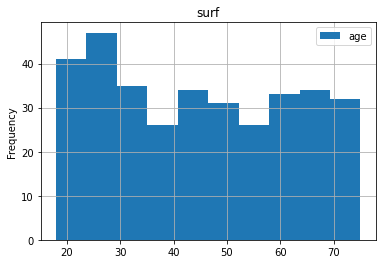

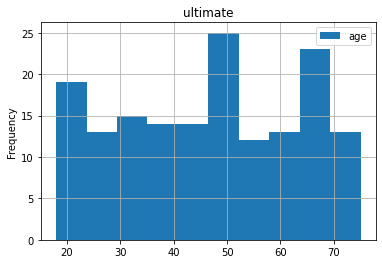

In [23]:
data_users.query('plan == "surf"').plot(y='age', kind='hist', bins=10, grid = True, title = 'surf')
data_users.query('plan == "ultimate"').plot(y='age', kind='hist', bins=10, grid = True, title = 'ultimate')
plt.show()

- En los histogramas de edad, podemos ver que los clientes entre 18 y 35 años es mas comun que contraten el programa surf 
- En los histogramas de edad, podemos ver que los clientes de 18, 20, 50 y 65 años es mas comun que contraten el programa uiltimate

### Encuentra los minutos que requieren los usuarios de cada tarifa

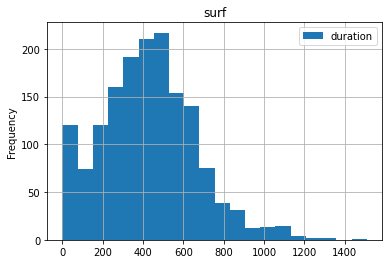

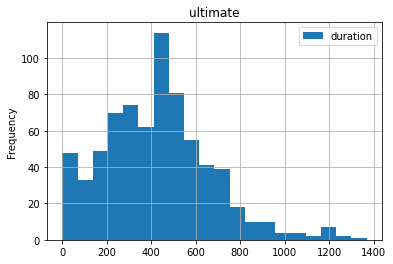

,media,mediana,varianza,des std
plan,,,,
surf,426.850000,424.0,55535.919854,235.660603
ultimate,428.071823,421.5,58543.878652,241.958423


In [24]:
# Creamos histogramas para los minutos que requieren los usuarios de cada tarifa
data_surf = data_final.query('plan == "surf"')
data_ultimate = data_final.query('plan == "ultimate"')
#calculamos la media, la varianza y la desviaciòn estandar por plan
data_call_avg = data_final.pivot_table(index='plan', values = 'duration', aggfunc= ['mean', 'median','var', 'std'])
data_call_avg.columns = ['media', 'mediana', 'varianza', 'des std']
# Creamos graficos para cada una de ellas 
data_surf.plot(y='duration', kind='hist', bins=20, grid = True, title = 'surf')
data_ultimate.plot(y='duration', kind='hist', bins=20, grid = True, title = 'ultimate')
plt.show()
data_call_avg

- En el plan `surf`, podemos observar que hay un pico entre 300 y 600 minutos
- En el plan `ultimate` podemos observar que hay un pico 500 minutos 
- Comparando los histogramas podemos observar que los usuarios del plan `surf`, usan mas minutos 
- En el plan `surf` podemos ver que la media es muy similar a la mediana, esto quiere decir que los datos se distribuyen de forma simétrica alrededor de la media
- En el plan `ultimate` podemos ver que la media es mayor que la mediana, esto quiere decir que los datos tienen una asimetría positiva
- La desviación estándar en el plan `surf` es baja, indica hay una menor dispersión de los datos

### SMS que requieren los usuarios de cada tarifa

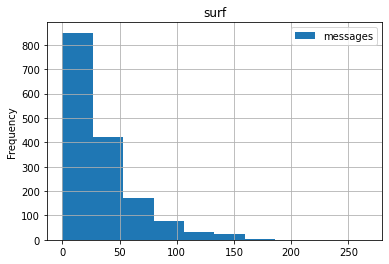

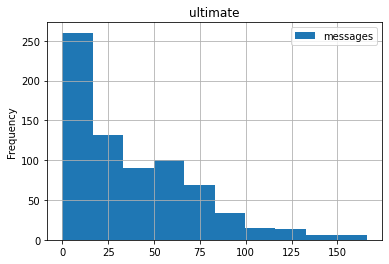

,media,mediana,varianza,des std
plan,,,,
surf,31.021519,24.0,1126.014736,33.556143
ultimate,37.343923,30.0,1209.827612,34.782576


In [25]:
# Creamos histogramas para los messages que requieren los usuarios de cada tarifa 
data_surf = data_final.query('plan == "surf"')
data_ultimate = data_final.query('plan == "ultimate"')
#calculamos la media, la varianza y la desviaciòn estandar por plan
data_messages_avg = data_final.pivot_table(index='plan', values = 'messages', aggfunc= ['mean', 'median','var', 'std'])
data_messages_avg.columns = ['media', 'mediana', 'varianza', 'des std']
data_surf.plot(y='messages', kind='hist', bins=10, grid = True, title = 'surf')
data_ultimate.plot(y='messages', kind='hist', bins=10, grid = True, title = 'ultimate')
plt.show()
data_messages_avg

- En el plan `surf`, podemos observar que la mayor parte de los datos se encuentran entre 0 y 50 mensajes 
- En el plan `ultimate` podemos observar que hay un pico de 0 a 30 mensajes 
- Comparando los histogramas podemos observar que los usuarios del plan `Surf`, usan mas mensajes 
- En el plan `surf` podemos ver que la media es mayor que la mediana, los datos tienen una asimetría positiva.
- En el plan `ultimate` podemos ver que la media es mayor que la mediana, los datos tienen una asimetría positiva.

### Volumen de datos que requieren los usuarios de cada tarifa por mes. 

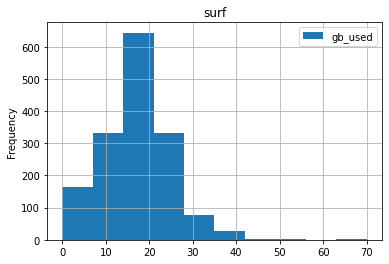

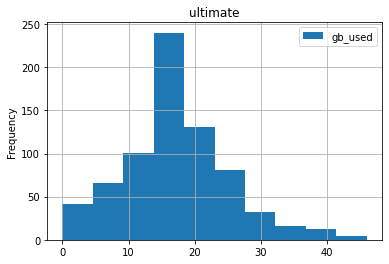

,media,mediana,varianza,des std
plan,,,,
surf,16.596835,17.0,62.537165,7.908044
ultimate,17.211326,17.0,60.153067,7.755841


In [26]:
# Creamos histogramas para los messages que requieren los usuarios de cada tarifa 
data_surf = data_final.query('plan == "surf"')
data_ultimate = data_final.query('plan == "ultimate"')
#calculamos la media, la varianza y la desviaciòn estandar por plan
data_gb_avg = data_final.pivot_table(index='plan', values = 'gb_used', aggfunc= ['mean', 'median','var', 'std'])
data_gb_avg.columns = ['media', 'mediana', 'varianza', 'des std']
data_surf.plot(y='gb_used', kind='hist', bins=10, grid = True, title = 'surf')
data_ultimate.plot(y='gb_used', kind='hist', bins=10, grid = True, title = 'ultimate')
plt.show()
data_gb_avg

- En el plan `surf`, podemos observar un pico entre 10 y 20 gb
- En el plan `ultimate` podemos observar un pico entre 10 y 20 gb
- Comparando los histogramas podemos observar que los usuarios con el plan `surf`, usan mas Gb
- En el plan `surf` y `ultimate` podemos ver que la media es muy similar a la mediana, esto nos indica que en los dos planes la distribuciòn es simetrica
- La desviaciòn estandar en el plan `surf` y `ultimate` es baja, indica hay menor dispersión de los datos

## Prueba las hipótesis

### El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.

In [27]:
data_final.pivot_table(index='plan', values = 'total_income', aggfunc=['mean', 'var'])

,mean,var
,total_income,total_income
plan,,
surf,60.526063,3061.548165
ultimate,72.301105,129.159556


In [28]:
income_ultimate_plan = data_final.query('plan == "ultimate"')['total_income_extra']
print(np.var(income_ultimate_plan))
income_surf_plan = data_final.query('plan == "surf"')['total_income_extra']
print(np.var(income_surf_plan))

128.98115900003052
3059.610476401058


- Hipótesis nula = El promedio de los ingresos por usuarios de las tarifas `Ultimate` y `Surf` son iguales. 
- Hipótesis alternativa = El promedio de los ingresos por usuarios de las tarifas `Ultimate` y `Surf` son diferentes.

Como las varianzas no son iguales, hay que establecer el parámetro equal_var en False

In [29]:
# establece un nivel crítico de significación estadística
alpha = 0.05
# realiza la prueba y calcula el valor p entre los dos datasets
results = st.ttest_ind(income_surf_plan, income_ultimate_plan, equal_var = False)
print('p-value:', results.pvalue )
# Compara el valor p con la significación estadística
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 1.3986405648962838e-129
Rechazamos la hipótesis nula


- Los ingresos entre `Surf`y `Ultimate` no es igual, se rechaza la hipótesis nula

### El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

In [30]:
# Hacemos una lista con las regiones que no sean Nueva York-Nueva Jersey
data_final['city'] = data_final['city'].where(data_final['city'] == "New York-Newark-Jersey City, NY-NJ-PA MSA", 'Other')
data_final

,user_id,month,gb_used,city,plan,churn_date,income_gb,messages,income_messages,calls,duration,income_minutes,total_income_extra,total_income
0,1000,12.0,2.0,Other,ultimate,1900-01-01 00:00:00,0.0,11.0,0.00,16.0,124.0,0.00,0.00,70.00
1,1001,8.0,7.0,Other,surf,1900-01-01 00:00:00,0.0,30.0,0.00,27.0,182.0,0.00,0.00,20.00
2,1001,9.0,14.0,Other,surf,1900-01-01 00:00:00,0.0,44.0,0.00,49.0,315.0,0.00,0.00,20.00
3,1001,10.0,22.0,Other,surf,1900-01-01 00:00:00,70.0,53.0,0.09,65.0,393.0,0.00,70.09,90.09
4,1001,11.0,19.0,Other,surf,1900-01-01 00:00:00,40.0,36.0,0.00,64.0,426.0,0.00,40.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,1470,12.0,0.0,Other,surf,0,0.0,153.0,3.09,78.0,592.0,2.76,5.85,25.85
2300,1482,10.0,0.0,Other,ultimate,0,0.0,2.0,0.00,0.0,0.0,0.00,0.00,70.00
2301,1484,11.0,0.0,Other,surf,0,0.0,1.0,0.00,2.0,38.0,0.00,0.00,20.00
2302,1491,4.0,0.0,Other,surf,0,0.0,6.0,0.00,8.0,44.0,0.00,0.00,20.00


In [31]:
income_Other = data_final.query('city == "Other"')['total_income_extra']
print(np.var(income_Other))
income_ny_nj = data_final.query('city != "Other"')['total_income_extra']
print(np.var(income_ny_nj))

2542.8232474520837
1988.054989745935


Como las varianzas no son iguales, hay que establecer el parámetro equal_var en False

- Hipótesis nula = El promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es igual al de los usuarios de otras regiones.
- Hipótesis alternativa = El promedio de los usuarios en el área de estados Nueva York-Nueva Jersey no es igual al de los usuarios de otras regiones.

In [32]:
# establece un nivel crítico de significación estadística
alpha = 0.05
# realiza la prueba y calcula el valor p entre los dos datasets
results = st.ttest_ind(income_Other, income_ny_nj, equal_var = False) 
# imprime el valor p obtenido
print('p-value:', results.pvalue)
# tu código: compara el valor p con el nivel de la significación estadística
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.19549648753588877
No rechazamos la hipótesis nula


- Los ingresos en el área de los estados Nueva York-Nueva Jersey es igual al de los usuarios de otras regiones.